<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l

     |████████████████████████████████| 82 kB 629 kB/s 
     |████████████████████████████████| 11.2 MB 24.2 MB/s 
     |████████████████████████████████| 61 kB 5.9 MB/s 
     |████████████████████████████████| 9.9 MB 42.3 MB/s 
     |████████████████████████████████| 900 kB 45.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you h

In [ ]:
import torch
import torch.nn as nn


def corr2d(x,k):
  h,w=k.shape
  y=torch.zeros((x.shape[0]-h+1,x.shape[1]-w+1))
  for i in range(y.shape[0]):
    for j in range(y.shape[1]):
      y[i,j]=(x[i:i+h,j:j+w]*k).sum()
  return y

X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

定义卷积层

In [ ]:
class Con2D(nn.Module):
  def __init__(self,kernal_size):
      super(Con2D,self).__init__()
      self.weight=nn.Parameter(torch.randn(kernal_size))
      self.bias=nn.Parameter(torch.zeros(1))
  def forward(self,x):
    return corr2d(x,self.weight)+self.bias

X = torch.ones((6, 8))
X[:, 2:6] = 0
X
K = torch.tensor([[1.0, -1.0]])
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

学习卷积核

->如果我们只需寻找黑白边缘，那么以上[1, -1]的边缘检测器足以。然而，当有了更复杂数值的卷积核，或者连续的卷积层时，我们不可能手动设计滤波器。那么我们是否可以学习由X生成Y的卷积核呢？

In [ ]:
Con2d=nn.Conv2d(1,1,kernel_size=(1,2),bias=False)

X=X.reshape(1,1,6,8)
Y=Y.reshape(1,1,6,7)
lr=3e-2
for i in range(10):
  output=Con2d(X)
  l=(output-Y)**2
  Con2d.zero_grad()
  l.sum().backward()
  Con2d.weight.data[:]-=lr*Con2d.weight.grad
  if (i+1)%2==0:
    print(f'epoch{i+1},loss{l.sum():.3f}')

epoch2,loss12.204
epoch4,loss2.646
epoch6,loss0.689
epoch8,loss0.216
epoch10,loss0.077


In [ ]:
Con2d.weight.data.reshape(1,2)

tensor([[ 0.9565, -1.0110]])

 **填充和步幅**

 填充可以增加输出的高度和宽度。这常用来使输出与输入具有相同的高和宽。

步幅可以减小输出的高和宽，例如输出的高和宽仅为输入的高和宽的1/n（n是一个大于1的整数）。

填充和步幅可用于有效地调整数据的维度。

In [ ]:
# 填充
import torch
import torch.nn as nn

def comp_con2d(con2d,x):
  x=x.reshape((1,1)+x.shape)
  y=con2d(x)
  return y.reshape(y.shape[2:])
# con2d=nn.Conv2d(1,1,kernel_size=3,padding=1)
x=torch.randn(size=(8,8))
# comp_con2d(con2d,x).shape

In [ ]:
# 当卷积核的高度和宽度不同时
con2d = nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(2, 1))
#这里的padding数字是指上或左填充的大小,而不是整体,比如当中的2,是上和下都填充2,所以ph=4
comp_con2d(con2d,x).shape

torch.Size([8, 8])

In [ ]:
con2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_con2d(con2d, x).shape

torch.Size([4, 4])

In [ ]:
con2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_con2d(con2d, x).shape


torch.Size([2, 2])

多输入通道

In [ ]:
import torch

import torch
import torch.nn as nn


def corr2d(x,k):
  h,w=k.shape
  y=torch.zeros((x.shape[0]-h+1,x.shape[1]-w+1))
  for i in range(y.shape[0]):
    for j in range(y.shape[1]):
      y[i,j]=(x[i:i+h,j:j+w]*k).sum()
  return y



def corr2d_multi_in(X, K):
  # 先遍历“X”和“K”的第0个维度（通道维度），再把它们加在一起
  return sum(corr2d(x, k) for x, k in zip(X, K))
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])
# for i,(x, k) in enumerate(zip(X, K)):
#   print(i,x)
#   print(k)
#   break
# print(K.shape)
print(corr2d_multi_in(X, K))

tensor([[ 56.,  72.],
        [104., 120.]])


多输出通道

In [ ]:
def corr2d_multi_in_out(X, K):
    # 迭代“K”的第0个维度，每次都对输入“X”执行互相关运算。
    # 最后将所有结果都叠加在一起
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)
print("原始K",K)
K = torch.stack((K, K + 1, K + 2), 0)
K.shape
print(K)


原始K tensor([[[0., 1.],
         [2., 3.]],

        [[1., 2.],
         [3., 4.]]])
tensor([[[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]]],


        [[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]],


        [[[2., 3.],
          [4., 5.]],

         [[3., 4.],
          [5., 6.]]]])


In [ ]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

1*1 卷积层

??1×1卷积层通常用于调整网络层的通道数量和控制模型复杂性

画一下图,恒容易理解

In [ ]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    # 全连接层中的矩阵乘法
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

池化层

对于给定输入元素，最大汇聚层会输出该窗口内的最大值，平均汇聚层会输出该窗口内的平均值。

汇聚层的主要优点之一是减轻卷积层对位置的过度敏感。

我们可以指定汇聚层的填充和步幅。

使用最大汇聚层以及大于1的步幅，可减少空间维度（如高度和宽度）。

汇聚层的输出通道数与输入通道数相同。

In [ ]:
import torch
import torch.nn as nn

def pool2d(x,p_size,mode='max'):
  p_h,p_w=p_size
  y=torch.zeros(x.shape[0]-p_h+1,x.shape[1]-p_w+1)
  for i in range(y.shape[0]):
    for j in range(y.shape[1]):
      if mode=='max':
        y[i,j]=x[i:i+p_h,j:j+p_w].max()
      if mode=='avg':
        y[i,j]=x[i:i+p_h,j:j+p_w].mean()
  return y
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
print(pool2d(X, (2, 2)))
pool2d(X, (2, 2), 'avg')

tensor([[4., 5.],
        [7., 8.]])


tensor([[2., 3.],
        [5., 6.]])

填充和步幅

In [ ]:
X=torch.arange(16,dtype=torch.float32).reshape(1,1,4,4)
print(x)
pool2d=nn.MaxPool2d(3)
print(pool2d(x))
pool2d1=nn.MaxPool2d(3,padding=1,)

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])
tensor([[[[10.]]]])


In [ ]:
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [ ]:
X = torch.cat((X, X + 1), 1)
print(X)
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])


tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

device cuda


100%|██████████| 235/235 [00:09<00:00, 24.53it/s]


acc 80.67999999999999
t-shirt   ,58.4
trouser   ,95.0
pullover   ,48.7
dress   ,81.7
coat   ,79.9
sandal   ,91.0
shirt   ,66.4
sneaker   ,97.0
bag   ,96.6
ankle boot   ,92.1


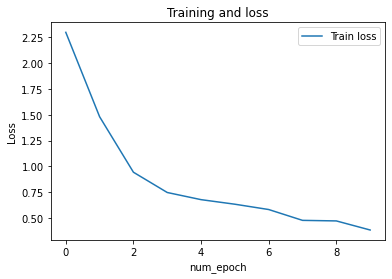

In [ ]:
import  torch
import torch.nn as nn
from tqdm import tqdm#引入进度条
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
# PIL TO TENSOR
transforms=transforms.Compose(
    [transforms.ToTensor(),
    # transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)
batch_size=256
num_epochs=10
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device",device)
# An MNIST-like dataset of 70,000 28x28 labeled fashion images,10000 test train 60000
train_dataset=torchvision.datasets.FashionMNIST("../data",train=True,transform=transforms,download=True)
test_dataset=torchvision.datasets.FashionMNIST("../data",train=False,transform=transforms,download=True)
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.model=nn.Sequential(nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1,padding=2),
                                nn.Sigmoid(),
                                 nn.AvgPool2d(kernel_size=2,stride=2),
                                 nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
                                 nn.Sigmoid(),
                                 nn.AvgPool2d(2, 2),
                                 Flatten(),
                                 nn.Linear(16*5*5,120),
                                 nn.Sigmoid(),
                                 nn.Linear(120,84),
                                 nn.Sigmoid(),
                                 nn.Linear(84,10)
                                 )
    def forward(self, x):
        x=self.model(x)
        return x
net=LeNet().to(device)
def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)
# x=torch.randn((1,1,28,28))
# print(net(x).shape)
# net = nn.Sequential(
#     nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
#     nn.AvgPool2d(kernel_size=2, stride=2),
#     nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
#     nn.AvgPool2d(kernel_size=2, stride=2),
#     Flatten(),
#     nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
#     nn.Linear(120, 84), nn.Sigmoid(),
#     nn.Linear(84, 10))
# X=torch.randn((1,1,28,28))
# # 查看每一层经过操作后的形状
# for layer in net:
#     X = layer(X)
#     print(layer.__class__.__name__,'output shape: \t',X.shape)


text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

n_total_steps=len(train_loader)
criterion=nn.CrossEntropyLoss()
optim=torch.optim.SGD(net.parameters(),lr=0.9)
n_total_len=len(train_loader)
train_loss=[]
for epoch in range(num_epochs):
    for batch_index,(imgs,labels) in enumerate(tqdm(train_loader)):
        imgs=imgs.to(device)
        labels=labels.to(device)

        output=net(imgs)
        loss=criterion(output,labels)

        optim.zero_grad()
        loss.backward()
        optim.step()
        # if (batch_index + 1) % 2000 == 0:
        #     print(
        #         f'Epoch [{epoch + 1}/{num_epochs}], Step [{batch_index + 1}/{n_total_steps}], Loss: {loss.item():.4f}')
    train_loss.append(loss.item())

with torch.no_grad():
    n_sample=0
    n_correct=0
    n_class_correct=[0 for i in range(10)]
    n_class_sample=[0 for i in range(10)]
    for imgs,labels in  test_loader:
        imgs=imgs.to(device)
        labels=labels.to(device)
        output=net(imgs)
        _,pre_index=torch.max(output,1)
        n_correct+=(pre_index==labels).sum().item()
        n_sample+=len(labels)
        for i in range(len(pre_index)):
            if(pre_index[i]==labels[i]):
                n_class_correct[labels[i]]+=1
            n_class_sample[labels[i]]+=1
    print("acc",(n_correct/n_sample)*100)
    for i in range(10):
        acc=100*n_class_correct[i]/(n_class_sample[i])
        print(f"{text_labels[i]}   ,{acc}")
plt.plot(range(len(train_loss)), train_loss, label='Train loss')

plt.xlabel("num_epoch")
plt.ylabel("Loss")
plt.title("Training and loss")
plt.legend()
plt.show()

In [ ]:
!pip install d2l  # installing d2l
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

     |████████████████████████████████| 82 kB 530 kB/s 
     |████████████████████████████████| 9.9 MB 29.3 MB/s 
     |████████████████████████████████| 15.7 MB 32.3 MB/s 
     |████████████████████████████████| 11.2 MB 23.2 MB/s 
     |████████████████████████████████| 61 kB 6.2 MB/s 
     |████████████████████████████████| 900 kB 43.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's depende

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
     |████████████████████████████████| 12.8 MB 4.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requi

loss 0.462, train acc 0.828, test acc 0.809
21285.9 examples/sec on cuda:0


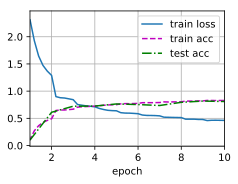

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)
def evaluate_accuracy_gpu(net, data_iter, device=None): 
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
with torch.no_grad():
    n_sample=0
    n_correct=0
    n_class_correct=[0 for i in range(10)]
    n_class_sample=[0 for i in range(10)]
    for imgs,labels in  test_iter:
        imgs=imgs.to(device)
        
        labels=labels.to(device)
        
        output=net(imgs)
        _,pre_index=torch.max(output,1)
        n_correct+=(pre_index==labels).sum().item()
        n_sample+=len(labels)
        for i in range(len(pre_index)):
            if(pre_index[i]==labels[i]):
                n_class_correct[labels[i]]+=1
            n_class_sample[labels[i]]+=1
    print("acc",(n_correct/n_sample)*100)
    for i in range(10):
        acc=100*n_class_correct[i]/(n_class_sample[i])
        print(f"{text_labels[i]}   ,{acc}")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


acc 80.92
t-shirt   ,66.2
trouser   ,93.9
pullover   ,75.4
dress   ,92.9
coat   ,49.4
sandal   ,95.8
shirt   ,58.7
sneaker   ,95.5
bag   ,92.9
ankle boot   ,88.5


In [1]:
import  torch
import torch.nn as nn
from tqdm import tqdm#引入进度条
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
# PIL TO TENSOR
transforms=transforms.Compose(
    [transforms.ToTensor(),
    # transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)
batch_size=256
num_epochs=10
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device",device)
# # An MNIST-like dataset of 70,000 28x28 labeled fashion images,10000 test train 60000
# train_dataset=torchvision.datasets.FashionMNIST("../data",train=True,transform=transforms,download=True)
# test_dataset=torchvision.datasets.FashionMNIST("../data",train=False,transform=transforms,download=True)
# train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
#                                          shuffle=False)

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.model=nn.Sequential(nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,stride=1,padding=2),
                                nn.Sigmoid(),
                                 nn.AvgPool2d(kernel_size=2,stride=2),
                                 nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
                                 nn.Sigmoid(),
                                 nn.AvgPool2d(2, 2),
                                 Flatten(),
                                 nn.Linear(16*5*5,120),
                                 nn.Sigmoid(),
                                 nn.Linear(120,84),
                                 nn.Sigmoid(),
                                 nn.Linear(84,10)
                                 )
    def forward(self, x):
        x=self.model(x)
        return x
net=LeNet().to(device)

device cpu


In [4]:
!pip install pip install ptflops
from ptflops import get_model_complexity_info
model_name = 'LeNet'
flops, params = get_model_complexity_info(net, (1, 28, 28), as_strings=True, 
print_per_layer_stat=True)#不用写batch_size大小，默认batch_size=1
print("%s |%s |%s" % (model_name, flops, params))


LeNet(
  0.062 M, 100.000% Params, 0.0 GMac, 100.000% MACs, 
  (model): Sequential(
    0.062 M, 100.000% Params, 0.0 GMac, 100.000% MACs, 
    (0): Conv2d(0.0 M, 0.253% Params, 0.0 GMac, 28.486% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, )
    (2): AvgPool2d(0.0 M, 0.000% Params, 0.0 GMac, 1.096% MACs, kernel_size=2, stride=2, padding=0)
    (3): Conv2d(0.002 M, 3.915% Params, 0.0 GMac, 56.272% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, )
    (5): AvgPool2d(0.0 M, 0.000% Params, 0.0 GMac, 0.373% MACs, kernel_size=2, stride=2, padding=0)
    (6): Flatten(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, )
    (7): Linear(0.048 M, 77.983% Params, 0.0 GMac, 11.208% MACs, in_features=400, out_features=120, bias=True)
    (8): Sigmoid(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, )
    (9): Linear(0.01 M, 16.472% Params, 0.0 GMac, 2.367% MACs, in_fe